In [1]:
# apply Figure 1
# Here I run all my functions from Figure 1
%run fig1_functions_latest.ipynb

In [2]:
###### parameters
t = np.arange(0, 8, 1/240)
x = np.arange(-180, 180, 0.5)
x_range = x
t_range = t
E_inh = -30 
E_exc = 60
c_o = 0.5 # max contrast for gradings stimuli
f=1 # Hz
omega = 2*math.pi*f
k = (2*math.pi)/45 # where 45 is the wavelength in degrees
tau = 0.15 # s
time_step = 1/240
FWHM = 5.7
#x_initial = -180
#which_stimulus = 'FTB_OFF' # choose the stimulus
#c = gratings(c_o, omega, k, t_range, x_range)# edge_stimulus(which_stimulus, t_range, x_range, x_initial)

In [3]:
####### Run all the functions: filters in FT, convolution, calculation of g's, V_m and calcium responses
h,h_shifted, sample_freq_x = gauss_FT(FWHM, x_range)
###### Run my simulation and then basicaly just play with data
sample_freq_shifted,f_shifted = time_filter(tau,t,time_step)
sample_freq_shifted_dev,f_dev_shifted = time_filter_der(tau,t,time_step)
c = gratings(c_o, f, k, t_range, x_range)# edge_stimulus(which_stimulus, t_range, x_range, x_initial)
c_shifted = contrast_fourier(c,x_range,t_range)
filtered_c_f = filtered_contrast_f(sample_freq_x, sample_freq_shifted,c_shifted, f_shifted,h_shifted) # nondelayed input
filtered_c_dev = filtered_contrast_f_dev(sample_freq_x, sample_freq_shifted_dev, c_shifted,f_dev_shifted,h_shifted) # delayed input
g1_div_g_l, g2_div_g_l, g3_div_g_l, V_m , calcium = g_vm_cal_calculation(filtered_c_f,filtered_c_dev)

In [4]:
sample_freq_x.shape

(720,)

<Figure size 1000x4000 with 0 Axes>

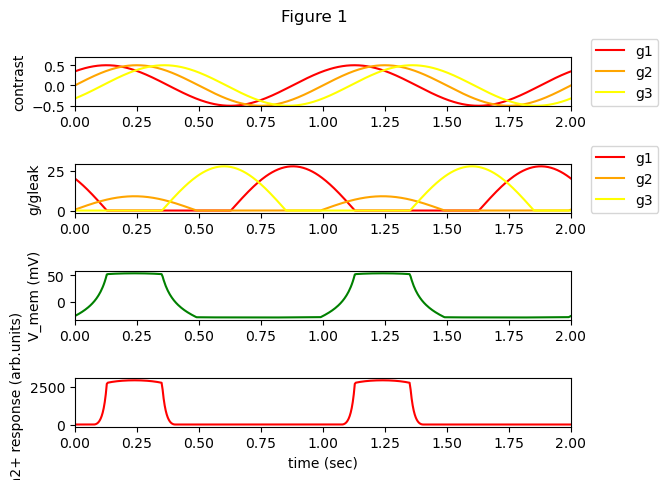

<Figure size 1000x4000 with 0 Axes>

In [5]:
#### V_m for x=0 
##### contrast over time
plt.subplot(4,1,1)
plt.plot(t, c[len(c)-11], label='g1', color='r')
plt.plot(t, c[0], label = 'g2', color= 'orange')
plt.plot(t, c[10], label = 'g3', color = 'yellow') #
plt.ylim(-0.5,0.7)
plt.xlim(0,2)
plt.legend(loc=(1.04, 0))
#plt.xlabel('time (sec)')
plt.ylabel('contrast')

##### g/g_leak

plt.subplot(4,1,2) # rows, column, plot position
plt.plot(t, g1_div_g_l[0,:], label='g1', color='r')
plt.plot(t, g2_div_g_l[0,:], label = 'g2', color= 'orange')
plt.plot(t, g3_div_g_l[0,:], label = 'g3', color = 'yellow') 
#plt.plot(t, g1_div_g_l[len(contrast)-11], label='g1', color='r')
#plt.plot(t, g2_div_g_l[0], label = 'g2', color= 'orange')
#plt.plot(t, g3_div_g_l[10], label = 'g3', color = 'yellow')
plt.legend(loc=(1.04, 0))
#plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlim(0,2)
#plt.legend()
#plt.title('Conductances over time')
#plt.xlabel('time (sec)')
plt.ylabel('g/gleak')


###### (V_m,t)

plt.subplot(4,1,3)
plt.plot(t,V_m[0,:], color = 'g')
plt.xlim(0,2)
#plt.ylim(-20,20)
#plt.xlabel('time (sec)')
plt.ylabel('V_mem (mV)')
#plt.title('Membrane Potential over time')


##### (Caclium,t)

plt.subplot(4,1,4)
plt.plot(t,(ramp(V_m[0,:]))**2, color = 'r')
plt.xlim(0,2)
plt.xlabel('time (sec)')
plt.ylabel('Ca2+ response (arb.units)')
#plt.title('Calcium responses over time')
plt.subplots_adjust(hspace = 1.2)

plt.suptitle("Figure 1")
plt.figure(figsize=(10,40))
#plt.savefig('figure1.pdf',bbox_inches="tight")
